<a href="https://colab.research.google.com/github/mgarbanzo/AgrometeoUCR/blob/main/Agrometeorolog%C3%ADa_UCR_2021_NDVI_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga de datos

Información para descarga manual [aquí](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi).

Utilizamos las 18 UTC del 1 de Febrero del 2021:

In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/032/18/OR_ABI-L2-CMIPF-M6C02_G16_s20210321800148_e20210321809456_c20210321809533.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/032/18/OR_ABI-L2-CMIPF-M6C03_G16_s20210321800148_e20210321809457_c20210321809536.nc

--2021-05-13 20:38:08--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/032/18/OR_ABI-L2-CMIPF-M6C02_G16_s20210321800148_e20210321809456_c20210321809533.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.80.240
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.80.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492777093 (470M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C02_G16_s20210321800148_e20210321809456_c20210321809533.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>] 469.95M  44.7MB/s    in 11s     

2021-05-13 20:38:19 (43.5 MB/s) - ‘OR_ABI-L2-CMIPF-M6C02_G16_s20210321800148_e20210321809456_c20210321809533.nc’ saved [492777093/492777093]

--2021-05-13 20:38:20--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/032/18/OR_ABI-L2-CMIPF-M6C03_G16_s20210321800148_e20210321809457_c20210321809536.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com).

In [ ]:
!pip install netcdf4

Tamaños:  (10848, 10848) (10848, 10848)


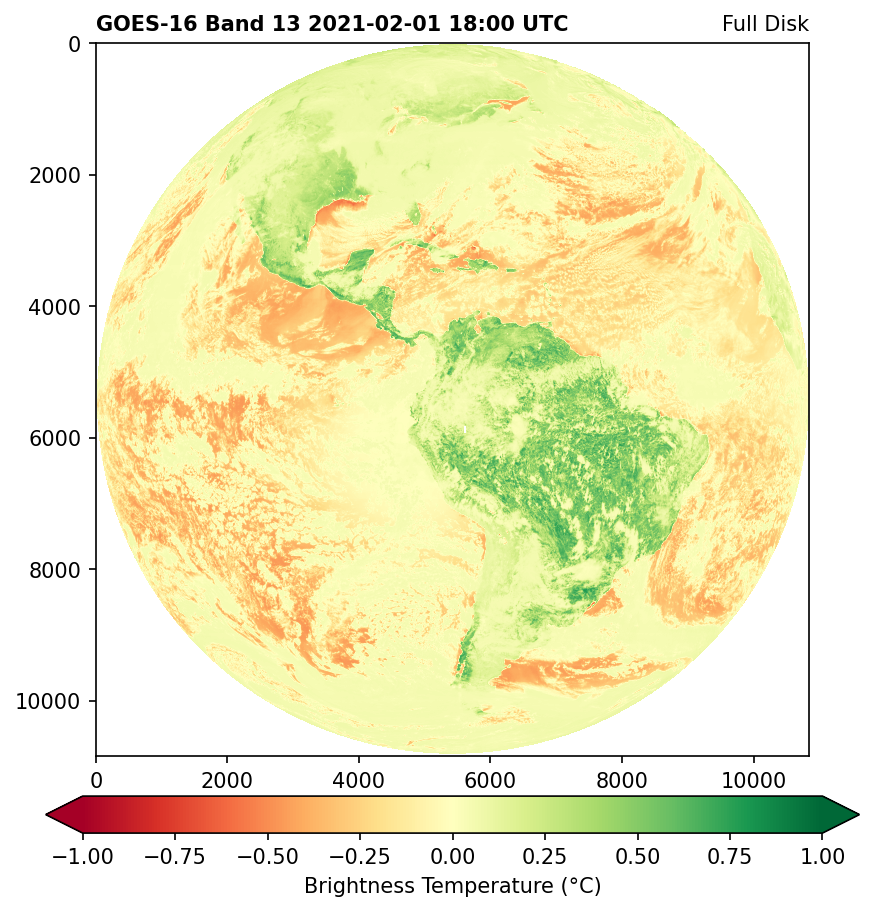

In [ ]:
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
from datetime import datetime    # Basic Dates and time types
import numpy as np

#----------------------------------------------------------------------------------------------------------- 
# Cargar metadatos de productos de GOES-R
ncCH02 = Dataset('/content/OR_ABI-L2-CMIPF-M6C02_G16_s20210321800148_e20210321809456_c20210321809533.nc')
ncCH03 = Dataset('/content/OR_ABI-L2-CMIPF-M6C03_G16_s20210321800148_e20210321809457_c20210321809536.nc')

# Cargar datos de productos de GOES-R
dataCH02 = ncCH02.variables['CMI'][:][::2,::2]
dataCH03 = ncCH03.variables['CMI'][:]
print("Tamaños: ",np.shape(dataCH02),np.shape(dataCH03))
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7), dpi=150)
 
NDVI = (dataCH03 - dataCH02)/(dataCH03 + dataCH02)

# Plot the image
plt.imshow(NDVI, vmin=-1, vmax=1, cmap='RdYlGn')
 
# Add a colorbar
plt.colorbar(label='Brightness Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(ncCH02.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 NDVI' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Image.png')
 
# Show the image
plt.show()